<a href="https://colab.research.google.com/github/Vinh1205/AI/blob/main/NhanDangKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

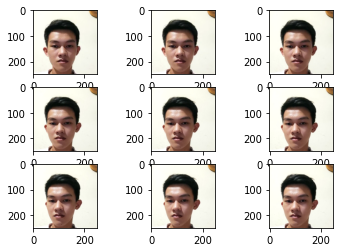

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Train/image/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanVinh_'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Train/image/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanVinh'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanChien'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanThanh'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanNinh'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('KhuonMat_photos.npy', photos)
save('KhuonMat_labels.npy', labels)

(40, 200, 200, 3) (40,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (200,200,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 13s 306ms/step - loss: 1407.0336 - accuracy: 0.2250
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 4954.4932 - accuracy: 0.3000
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 800.3600 - accuracy: 0.1750
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 171.3155 - accuracy: 0.2750
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 39.1231 - accuracy: 0.6750
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 8.3576 - accuracy: 0.9250
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 50.5840 - accuracy: 0.6000
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 84.1994 - accuracy: 0.6000
Epoch 9/50
2/2 [==============================] - 0s 33ms/step - loss: 11.0407 - accuracy: 0.9250
Epoch 10/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 11/

In [5]:
model.evaluate(photos,labels)

2/2 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [6]:
model.save('KhuonMat_Final.h5')

In [7]:
from keras.models import load_model
models=load_model('KhuonMat_Final.h5')

In [8]:
classes = ["BanVinh","BanChien","BanThanh","BanNinh"]

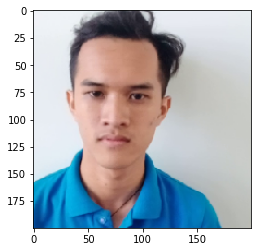

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('BanThanh_7.bmp', target_size=(200,200))
plt.imshow(img)

In [12]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[2.0555353e-03 5.9223443e-04 9.0672988e-01 3.5075832e-03 2.1323755e-03
  6.3644797e-03 1.4421000e-03 7.0199613e-03 1.4005368e-02 1.4229415e-03
  5.4727621e-02]]


'BanThanh'